In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
import sklearn

C:\Users\MONSTER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MONSTER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\MONSTER\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
sklearn.__version__

'1.2.0'

In [3]:
df = pd.read_csv('final_scout_not_dummy.csv')

In [4]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


In [7]:
df.corr()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
price,1.000000,-0.399291,0.530291,-0.473478,-0.144628,0.696411,0.008180,0.281824,0.468433,0.272261
km,-0.399291,1.000000,-0.033171,0.758306,0.157041,0.004217,-0.049443,0.306774,0.147098,-0.300198
Gears,0.530291,-0.033171,1.000000,-0.064524,-0.036612,0.449793,-0.011096,0.339507,0.333928,-0.003733
age,-0.473478,0.758306,-0.064524,1.000000,0.316108,-0.083254,-0.045511,0.215266,0.064883,-0.341303
Previous_Owners,-0.144628,0.157041,-0.036612,0.316108,1.000000,-0.022556,0.019545,0.027958,0.003443,-0.020172
hp_kW,0.696411,0.004217,0.449793,-0.083254,-0.022556,1.000000,0.036608,0.597485,0.638310,0.388912
Inspection_new,0.008180,-0.049443,-0.011096,-0.045511,0.019545,0.036608,1.000000,-0.025983,-0.035517,0.147814
Displacement_cc,0.281824,0.306774,0.339507,0.215266,0.027958,0.597485,-0.025983,1.000000,0.563375,0.037814
Weight_kg,0.468433,0.147098,0.333928,0.064883,0.003443,0.638310,-0.035517,0.563375,1.000000,0.088932
cons_comb,0.272261,-0.300198,-0.003733,-0.341303,-0.020172,0.388912,0.147814,0.037814,0.088932,1.000000


In [8]:
df.describe(include="object").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
Extras,15915,659,Alloy wheels,5785
Safety_Security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15915,3,Metallic,15246


In [9]:
# Car Comfort & Conveniance Packages

premium = ["Electrical side mirrors", "Parking assist", "Air conditioning", "Hill Holder", "Power windows"]
premium_plus = ["Keyless central door lock", "Heads-up", "Massage seats", "heating", "Automatic climate control", "Heated"]

df['Comfort_Convenience'] = df['Comfort_Convenience'].apply(lambda sentence: "Premium Plus" if all(word in sentence for word in premium_plus) else ("Premium" if all(word in sentence for word in premium) else "Standard"))

In [10]:
# Car Entertainment & Media Packages

media_plus = ["Digital radio", "Hands-free", "Television"]

df['Entertainment_Media'] = df['Entertainment_Media'].apply(lambda sentence: "Plus" if any(word in sentence for word in media_plus) else "Standard")

In [11]:
# Extras 
df["Extras"] = df["Extras"].apply(lambda x: x.count(",")).add(1)

In [12]:
# Car Safety & Security Packages

premium = ["Tire pressure", "Traction control", "Daytime running lights", "LED Headlight", "Tire pressure"]
premium_plus = ["Emergency brake assistant", "Electronic stability control"]

df['Safety_Security'] = df['Safety_Security'].apply(lambda sentence: "Safety Premium Package" if any(word in sentence for word in premium) else ("Safety Premium Plus Package" if any(word in sentence for word in premium_plus) else "Safety Standard Package"))

In [13]:
df.describe(include="object").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,3,Standard,10783
Entertainment_Media,15915,2,Plus,10807
Safety_Security,15915,3,Safety Premium Package,14617
Paint_Type,15915,3,Metallic,15246
Upholstery_type,15915,2,Cloth,12234


In [14]:
df.sample(3).T

,12920,3829,6602
make_model,Opel Insignia,Audi A3,Opel Astra
body_type,Sedans,Sedans,Sedans
price,31990,21500,17590
vat,VAT deductible,VAT deductible,VAT deductible
km,1402.0,35000.0,11534.0
Type,Demonstration,Used,Used
Fuel,Diesel,Diesel,Benzine
Gears,6.0,7.0,6.0
Comfort_Convenience,Standard,Standard,Premium
Entertainment_Media,Standard,Plus,Plus


In [15]:
df.to_csv("final_scout_dummy.csv", index=False)

# Linear Regression Model

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

pd.set_option('float_format', '{:.2f}'.format)

In [17]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [18]:
X= df.drop(columns="price")
y= df.price

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Ridge model

In [20]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience', 'Entertainment_Media', 'Safety_Security', "vat"]
    
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']
cat_for_vat = ["Price negotiable", "VAT deductible"]

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety, cat_for_vat])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                       remainder='passthrough')


operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations)

ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package'],
                                                                             ['Price '
                                                                              'negotiable',
                                                                              'VAT '
                                                                              'deductible']]),
                                                  ['Comfort_Convenience',
                                                   'Entertainment_Media',
                                                   'Safety_Security',
                                                   'vat'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [21]:
train_val(ridge_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.87,0.86
mae,1838.49,1867.78
mse,7186374.47,7206324.55
rmse,2680.74,2684.46


In [22]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.87
train_r2                                   0.87
test_neg_mean_absolute_error           -1849.39
train_neg_mean_absolute_error          -1838.02
test_neg_mean_squared_error         -7314403.23
train_neg_mean_squared_error        -7181013.31
test_neg_root_mean_squared_error       -2699.20
train_neg_root_mean_squared_error      -2679.67
dtype: float64

In [23]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # Parametre isimleri pipeline da tanımlanan model ismi ile birlikte kullanılmalıdır.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Stand...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [24]:
ridge_grid_model.best_params_

{'Ridge__alpha': 1.02}

In [25]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.87,0.86
mae,1838.49,1867.77
mse,7186586.41,7206283.14
rmse,2680.78,2684.45


## Lasso model

In [26]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.87,0.87
mae,1840.32,1867.96
mse,7201114.77,7179773.94
rmse,2683.49,2679.51


In [27]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [28]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.87
train_r2                                   0.87
test_neg_mean_absolute_error           -1850.35
train_neg_mean_absolute_error          -1839.71
test_neg_mean_squared_error         -7316657.77
train_neg_mean_squared_error        -7193448.34
test_neg_root_mean_squared_error       -2699.50
train_neg_root_mean_squared_error      -2681.99
dtype: float64

In [29]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]
model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}  # Parametre isimleri pipeline da tanımlanan model ismi ile birlikte kullanılmalıdır.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Stand...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [30]:
lasso_grid_model.best_params_

{'Lasso__alpha': 1.02}

In [31]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.87,0.87
mae,1840.34,1867.97
mse,7201525.60,7179450.76
rmse,2683.57,2679.45


## Final Linear Regression and Feature Importance

In [32]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package'],
                                                                             ['Price '
                                                                              'negotiable',
                                                                              'VAT '
                                                                              'deductible']]),
                                                  ['Comfort_Convenience',
                                                   'Entertainment_Media',
                                                   'Safety_Security',
                                                   'vat'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [33]:
df_feat_imp = pd.DataFrame(model["Lasso"].coef_, index = model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

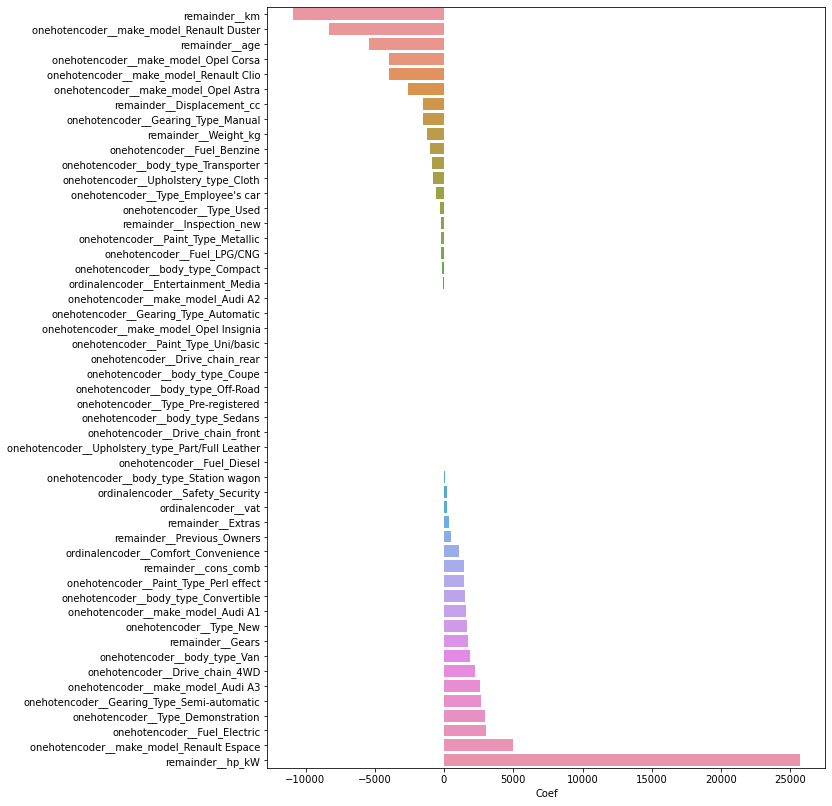

In [34]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp, x=df_feat_imp.Coef, y=df_feat_imp.index);

In [87]:
df_new = df[["make_model", "hp_kW", "km","age", "Gearing_Type", "Gears","Fuel", "price"]]
df_new.to_csv("auto_scout_for_deployment.csv", index_label=False)

In [88]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [90]:
cat_onehot = ['make_model','Fuel', 'Gearing_Type']

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       remainder='passthrough')

In [101]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'Fuel',
                                                   'Gearing_Type'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [103]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.85,0.85
mae,1953.55,1978.34
mse,8144589.03,8186608.26
rmse,2853.87,2861.22


In [104]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model_cr = Pipeline(steps=operations)

scores = cross_validate(model_cr, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [105]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.85
train_r2                                   0.85
test_neg_mean_absolute_error           -1957.53
train_neg_mean_absolute_error          -1953.30
test_neg_mean_squared_error         -8190544.79
train_neg_mean_squared_error        -8142340.44
test_neg_root_mean_squared_error       -2854.35
train_neg_root_mean_squared_error      -2853.38
dtype: float64

In [106]:
import pickle
pickle.dump(model, open("model_auto", 'wb'))

In [107]:
df_new.sample()

,make_model,hp_kW,km,age,Gearing_Type,Gears,Fuel,price
11972,Opel Insignia,100.00,24208.00,1.00,Automatic,6.00,Diesel,23849


In [108]:
my_dict = {"make_model" : "Renault Clio", 
           "hp_kW" : 100 , 
           "km" : 5000,
           "age" : 1  , 
           "Gearing_Type" : "Automatic" , 
           "Gears" : 6, 
           "Fuel" : "Benzine"
           }

In [109]:
auto_price = pickle.load(open('model_auto', 'rb'))

In [110]:
df_sample = pd.DataFrame.from_dict([my_dict])
auto_price.predict(df_sample)

array([18094.59569681])